# Load Libraries

In [1]:
import pandas as pd  # Importing the Pandas library, which provides data manipulation and analysis functionalities.
import tensorflow as tf  # Importing the TensorFlow library, an open-source machine learning framework.
from tensorflow import keras  # Importing the Keras module from TensorFlow, which provides a high-level API for building and training neural networks.
from sklearn.model_selection import train_test_split  # Importing the train_test_split function from scikit-learn, a machine learning library, used for splitting the data into training and testing sets.
from sklearn.preprocessing import LabelEncoder  # Importing the LabelEncoder class from scikit-learn, which is used to encode categorical variables into numerical values.


# Load Data

In [2]:
# Load the data from a CSV file
data = pd.read_csv('accdata2.csv')

In [3]:
# drop duplicate rows
data = data.drop_duplicates()


In [4]:
# convert type to float
data['estimated_x'] = data['estimated_x'].str[:7].astype(float)
data['estimated_y'] = data['estimated_y'].str[:7].astype(float)
data['estimated_z'] = data['estimated_z'].str[:7].astype(float)

<ipython-input-4-d834e3f0a7f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['estimated_x'] = data['estimated_x'].str[:7].astype(float)
<ipython-input-4-d834e3f0a7f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['estimated_y'] = data['estimated_y'].str[:7].astype(float)
<ipython-input-4-d834e3f0a7f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [5]:
# Separate the features (X) and the target variable (y)
X = data[['estimated_x', 'estimated_y', 'estimated_z']]
y = data['Status']

In [6]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- **model = keras.Sequential([...]):** Creating a sequential model using Keras, which allows us to stack multiple layers one after another.

- **keras.layers.Dense(64, activation='relu', input_shape=(3,)):** Adding a fully connected dense layer to the model with 64 units/neurons. The 'relu' activation function is applied, and the input_shape parameter is set to (3,) as the input features have three dimensions.

- **keras.layers.Dense(32, activation='relu'):** Adding another fully connected dense layer to the model with 32 units/neurons and 'relu' activation.

- **keras.layers.Dense(len(label_encoder.classes_), activation='softmax'):** Adding the output layer to the model with a number of units equal to the number of classes in the target variable (encoded using LabelEncoder). The 'softmax' activation function is applied to produce a probability distribution over the classes.

In [8]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

- **model.compile(...):** Configuring the model for training by specifying the optimizer, loss function, and metrics to evaluate the model's performance during training.

- **optimizer='adam':** Using the Adam optimizer, which is an efficient variant of stochastic gradient descent (SGD) that adapts the learning rate.

- **loss='sparse_categorical_crossentropy':** Using the sparse categorical cross-entropy loss function, which is suitable for multi-class classification problems with integer-encoded labels.

- **metrics=['accuracy']:** Tracking the accuracy metric during training to evaluate the model's performance.

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- **model.fit(...):** Training the model on the training data.

- **X_train, y_train:** The input features and corresponding target labels for the training set.

- **epochs=10:** Training the model for 10 epochs, where an epoch represents a complete iteration over the entire training dataset.

- **batch_size=32:** The number of samples used in each batch during training. The model's weights are updated after processing each batch.

- **validation_data=(X_test, y_test):** Evaluating the model's performance on the validation set during training. X_test and y_test represent the input features and target labels for the validation set.

In [10]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
6/6 [==============================] - 1s 49ms/step - loss: 55.1513 - accuracy: 0.1296 - val_loss: 44.1717 - val_accuracy: 0.0488
Epoch 2/10
6/6 [==============================] - 0s 11ms/step - loss: 32.4105 - accuracy: 0.0802 - val_loss: 22.6199 - val_accuracy: 0.2439
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 16.7533 - accuracy: 0.2531 - val_loss: 15.1736 - val_accuracy: 0.0488
Epoch 4/10
6/6 [==============================] - 0s 11ms/step - loss: 9.8699 - accuracy: 0.2284 - val_loss: 5.1102 - val_accuracy: 0.2439
Epoch 5/10
6/6 [==============================] - 0s 12ms/step - loss: 3.8085 - accuracy: 0.4444 - val_loss: 1.5982 - val_accuracy: 0.6585
Epoch 6/10
6/6 [==============================] - 0s 8ms/step - loss: 3.5070 - accuracy: 0.5247 - val_loss: 1.5555 - val_accuracy: 0.8293
Epoch 7/10
6/6 [==============================] - 0s 9ms/step - loss: 3.1013 - accuracy: 0.8272 - val_loss: 1.5097 - val_accuracy: 0.8780
Epoch 8/10
6/6 [========

- **test_loss, test_accuracy = model.evaluate(X_test, y_test):** Evaluating the trained model's performance on the test data to obtain the loss and accuracy metrics. The evaluate() function calculates the loss and metrics specified during the model compilation.

- **print('Test Loss:', test_loss):** Printing the test loss value, which indicates the average loss on the test dataset. This provides insights into how well the model performs in terms of minimizing the loss function.

- **print('Test Accuracy:', test_accuracy):** Printing the test accuracy value, which represents the proportion of correctly classified samples in the test dataset. It indicates the model's performance in terms of classification accuracy.

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.7769 - accuracy: 0.8293
Test Loss: 0.7769172191619873
Test Accuracy: 0.8292682766914368


# Save Model in .h5 

In [ ]:
model.save('model.h5')

# Save model in tflite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:

def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
  y_min, y_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 41),
  np.linspace(y_min, y_max, 100))


  # Plot decision boundary
  # plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

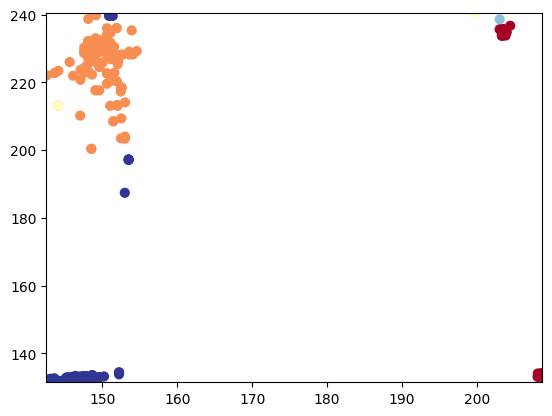

In [44]:
plot_decision_boundary(model,X,y)